In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData
import uvtools
from astropy.io import fits

In [2]:
datadir1 = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/2457548/'
datadir2 = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/2457549/'
outpath = '/lustre/aoc/projects/hera/agavidia/casalogs/fixedHERA19data/'

In [3]:
uvd1 = UVData()
uvd2 = UVData()

In [4]:
uvd1.read(datadir1 + 'lst.2457548.12h00m00s.12h05m50s.uvcRP.drift.uvh5')
uvd2.read(datadir2 + 'lst.2457549.12h00m00s.12h05m50s.uvcRP.drift.uvh5')

In [5]:
flags = np.logical_or(uvd1.flag_array, uvd2.flag_array)

In [6]:
uvd1.flag_array = flags
uvd2.flag_array = flags

In [7]:
uvd1.write_uvfits(outpath+'lst.2457548.12h00m00s.12h05m50s.uvcRP.drift.fits',force_phase=True,spoof_nonessential=True)
uvd2.write_uvfits(outpath+'lst.2457549.12h00m00s.12h05m50s.uvcRP.drift.fits',force_phase=True,spoof_nonessential=True)

The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.
The data are in drift mode and do not have a defined phase center. Phasing to zenith of the first timestamp.


In [8]:
psfdir = '/lustre/aoc/projects/hera/agavidia/casalogs/fixedHERA19data/'

In [9]:
psf1 = fits.open(psfdir+'lst.2457548.12h00m00s.12h05m50s.psf.fits')
psf2 = fits.open(psfdir+'lst.2457549.12h00m00s.12h05m50s.psf.fits')

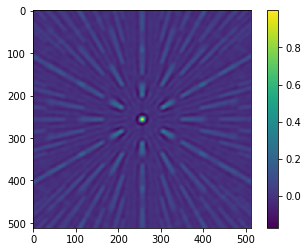

In [10]:
plt.figure()
plt.imshow(psf1[0].data[0,0,:,:])
plt.colorbar()

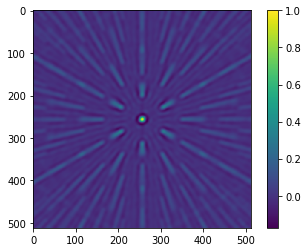

In [11]:
plt.figure()
plt.imshow(psf2[0].data[0,0,:,:])
plt.colorbar()

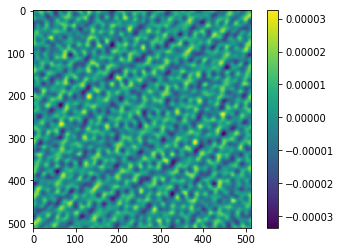

In [12]:
plt.figure()
plt.imshow(psf1[0].data[0,0,:,:]-psf2[0].data[0,0,:,:])
plt.colorbar()